## **Dimensionality Reduction**

- It is a technique used to reduce the **Number of Features in a dataset** (conditioning information) while preserving as much information as possible.
- Advantages:
    - Improving Computational Efficiency
    - Visualization: Multi-dimensional data is impossible to visualize therefore data scientists condense the data into 2 components for X and Y to plot in 2-D 
    - Reducing Noise: by reducing the complexity and detailed information
    - Improving the model performance: minimizing overfitting 
- Types:
    - PCA (Principal Component Analysis):  Most Popular
        - It looks for a new set of dimension that are **linear** combinations of the original features
        - These features are called Principal Components
        - The first component always captures the most variance in data, second is lesser, third is even more lesser and so on...
        - Drawback: Loss of Information when data have lot of non-linear relationships
    - t-SNE (t-Distributed Stochastic Neighbor Embedding):
        - Non-linear transformation
        - Drawback: Focuses more on local structure than on global structure 
    - Autoencoders:
        - They are Neural Networks that are trained to absorb and reconstruct data without the noise (with compression if needed)

## **PCA**

![PCA](https://cdn.botpenguin.com/assets/website/Screenshot_2024_02_22_at_11_12_30_AM_8a29391ea1.webp)

Note: The Squares appear to be Elongated in the 2nd picture because some information about the depth is compressed and putted inside length
Similarly, in 3rd picture the lines appears to be longer than the squares of the 2nd picture because the some information about breadth is compressed and putted inside the 3rd picture as increase in length

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
cancer_data = load_breast_cancer()
#sklearn's datasets are already packaged
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

convert this dataset into a dataframe:

In [50]:
X = pd.DataFrame(data=cancer_data['data'], columns=cancer_data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
X.shape

(569, 30)

>Its recommended to standardize data before performing PCA
- If you don’t scale before PCA:

    - PCA will treat features with larger numerical ranges as more important — not because they carry more real information, but because they have higher variance due to scale.


In [52]:
SS = StandardScaler()
X_scaled = SS.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [53]:
X_scaled.shape

(569, 30)

569 Rows & 30 Columns 

We are going to reduce number of features from 30 to 2 PCs:

In [54]:
pca_model_2 = PCA(n_components=2)       #n_components --> convert to 2 features

In [55]:
X_scaled_2_pca = pca_model_2.fit_transform(X_scaled)

- Instead of these 2 separate lines:
    - pca_model_2.fit(X_scaled)
    - X_scaled_2_pca = pca_model_2.transform(X_scaled)
- sklearn gives us One --> .fit_transform()

In [56]:
X_scaled_2_pca.shape

(569, 2)

569 Rows & 2 Columns
- And these 2 columns are not some important original columns from the dataset 
But rather PCA creates its own columns in which it combines important features of other columns that say the same things (overlap) --> **PCA1** and **PCA2**

In [57]:
X_scaled_2_pca[:4]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912]])

## Explained Variance Analysis
- EVA helps choose the optimal number of PCs for dimensionality reductions 
- Steps:
    1. Build PCA for max number of components/features (original number of features)
    2. Fit the data 
    3. Calculate the cumulative sum (running total) of EVR
    4. Plot the results 
    5. Choose the optimal value where curve is closer to 1 and starts to flatten     

In [58]:
#step 1
pca_model_full = PCA()          #pca_model_full --> this name cuz we are making it for the full dataset

#step 2
pca_model_full.fit(X_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

In [59]:
#step 3 - calculate EVR value
pca_evr = pca_model_full.explained_variance_ratio_

#cumulative sum
pca_evr_cumsum = np.cumsum(pca_evr)

In [60]:
#optional - its easier to put the outcome as a dataframe 
df_pca_evr = pd.DataFrame({
                          'Princ Comp':range(1,31),
                          'Princ Comp EVR':pca_evr,
                          'Princ Comp EVR CumSum':pca_evr_cumsum
                          })

df_pca_evr

,Princ Comp,Princ Comp EVR,Princ Comp EVR CumSum
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343
5,6,0.040245,0.887588
6,7,0.022507,0.910095
7,8,0.015887,0.925983
8,9,0.013896,0.939879
9,10,0.011690,0.951569


Text(0.5, 1.0, 'Cummulative Explained Variance Curve')

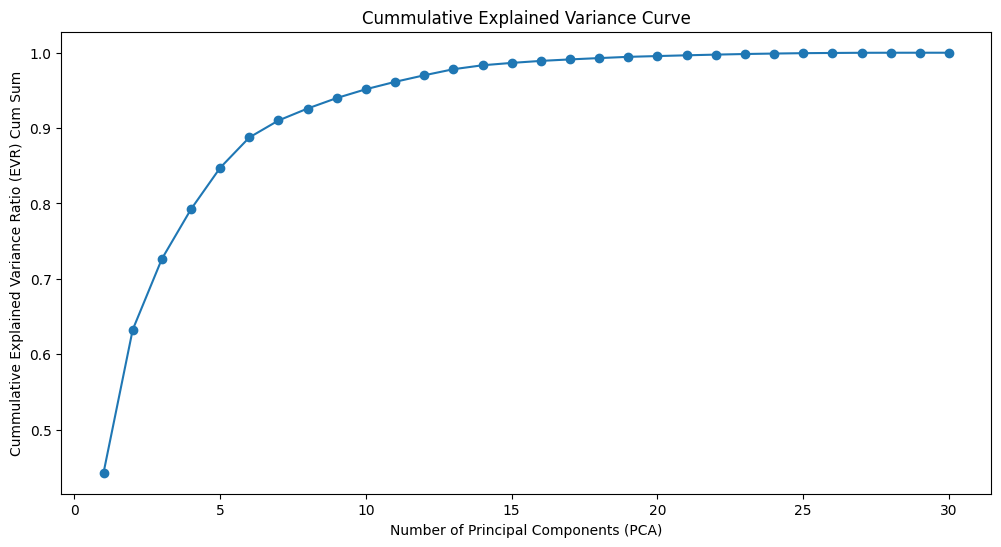

In [61]:
plt.figure(figsize=(12,6))

plt.plot(df_pca_evr['Princ Comp'], df_pca_evr['Princ Comp EVR CumSum'])
plt.scatter(df_pca_evr['Princ Comp'], df_pca_evr['Princ Comp EVR CumSum'])
plt.xlabel('Number of Principal Components (PCA)')
plt.ylabel('Cummulative Explained Variance Ratio (EVR) Cum Sum')
plt.title('Cummulative Explained Variance Curve')

- We can see that ass we increase the number of PCs, we get higher EVR Value (closer to 1 or 100%)
- Choosing the best numbers:
    - 7 looks ideal, as it can explain the variance upto 0.910095. So, for performance improvements, it should work
    - For visualization, we have to stick with 2 only (3 if the audience is comfortable with 3d plots) with the caveat that 2 components are able to only explain 0.63 EVR

## Visualize and Interpret PCA

In [62]:
X_scaled_2_pca[:4]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912]])

Text(0, 0.5, 'Second Principle Component')

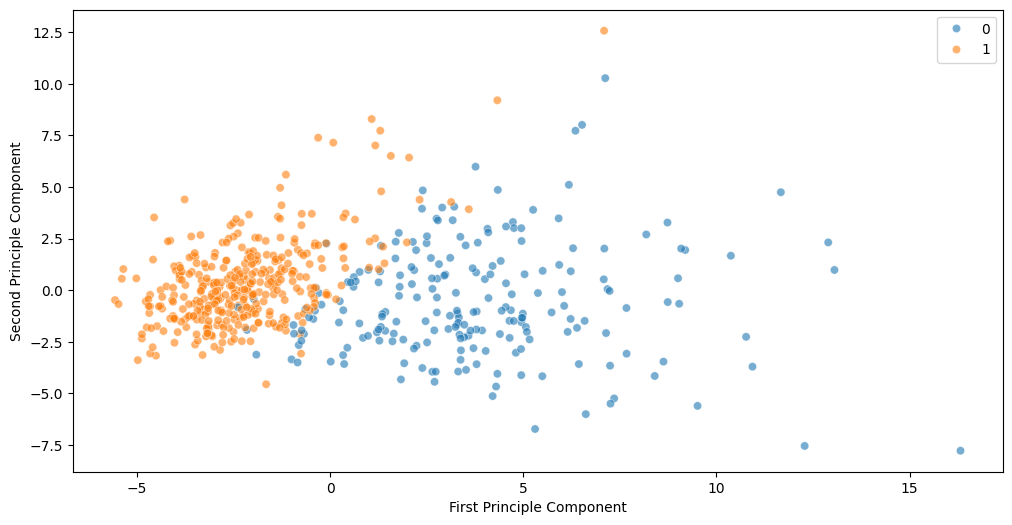

In [63]:
plt.figure(figsize=(12,6))

#suppose we have 2 clusters (coming from target) 
sns.scatterplot(x=X_scaled_2_pca[:, 0], y=X_scaled_2_pca[:, 1], alpha=0.6, hue=cancer_data['target'])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

> If we draw a line in between then PCA actually separated the clusters appropriately 

### **PCA Loadings Analysis**
- They are used to understand the relationship between the original feature in the dataset and newly built PCs column
- They help interpret how much each 'original' feature contributes to each PCs
- To perform the analysis, we build the **Loadings Matrix**


In [64]:
#calculate the laodings
pca_2_loadings = pca_model_2.components_

print('Loadings of PC 1: \n', pca_2_loadings[0])
print('------')
print('Loadings of PC 2: \n', pca_2_loadings[1])

Loadings of PC 1: 
 [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
------
Loadings of PC 2: 
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [65]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [66]:
loadings_matrix = pd.DataFrame(pca_2_loadings, columns=X.columns).T         #This converts that NumPy array into a DataFrame.
#                                                                 |
#                                                              transpose

loadings_matrix.columns = ['PC1', 'PC2']
loadings_matrix

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


In [67]:
loadings_matrix.max()

PC1    0.260854
PC2    0.366575
dtype: float64

In [68]:
#get the top 3 loadings per component 
top_loadings = loadings_matrix.apply(lambda x: x.abs().nlargest(3).index, axis=0)
top_loadings

,PC1,PC2
0,mean concave points,mean fractal dimension
1,mean concavity,fractal dimension error
2,worst concave points,worst fractal dimension


In [69]:
top_loadings = loadings_matrix.apply(lambda x: x.nlargest(3).values, axis=0)
top_loadings

,PC1,PC2
0,0.260854,0.366575
1,0.258400,0.280092
2,0.250886,0.275339


In [70]:
print(top_loadings)

        PC1       PC2
0  0.260854  0.366575
1  0.258400  0.280092
2  0.250886  0.275339
